La idea es modelar la din ́amica de un bosque que se incendia.  Usaremos el modelo de
incendio forestal propuesto por Back y col.  en 1990 y Drossel y Schwabl en 1992.
Podemos representar un bosque con una grilla de N celdas en una dimensi ́on, numeradas del 1 al N.  Cada celda puede estar en tres estados posibles:  0 significa que est ́a vac ́ıa;  1 significa que hay un  ́arbol vivo;  y −1,  que hay un  ́arbol quemado.  Inicialmente todas las celdas del bosque est ́an vac ́ıas, luego suceden cuatro momentos o  ́epocas:

1) Epoca primaveral o de brotes:
con probabilidad p en cada celda vac ́ıa brota un ́arbol.

2) Epoca de ca ́ıda de rayos:
con probabilidad f caen rayos en el bosque y si hab ́ıa un  ́arbol donde cay ́o un rayo, este  ́arbol se quema (por lo que el bosque resultante tendr ́a lugares vac ́ıos,  ́arboles vivos y  ́arboles quemados).

3) Epoca de incendios:
se propaga el incendio todo lo posible.  Cada  ́arbol quemado propaga el fuego a los  ́arboles vecinos vivos inmediatos (el de la derecha y el de la izquierda).
Nota:  la propagaci ́on termina cuando no queda ning ́un  ́arbol quemado que pueda propagar el fuego.

4) Epoca de limpieza:
se  tiran  abajo  los  ́arboles quemados  y esas  celdas pasan  a estar vac ́ıas nuevamente.
Tras  la  limpieza,  se  cuenta  la  cantidad  de   ́arboles  que  sobreviven,  cerrandose  el  ciclo
anual.   El  bosque  resultante  recomienza  el  proceso,  en  el  paso  1.




1) Represente  el  estado  del  bosque  mediante  un  vector  denominado bosque de N ele-mentos (N= 10 por ejemplo), donde cada elemento representa una celda.  Llamemos
bosque vac ́ıo a un bosque que s ́olo tenga celdas vac ́ıas, bosque limpio a un bosque que s ́olo tenga celdas vac ́ıas y  ́arboles vivos,
bosque quemado a un bosque que tenga celdas vac ́ıas,  ́arboles vivos y  ́arboles quemados.  Genere un bosque de cada tipo.

In [70]:
N = 10
bosque_vacio <- function(N){
    return(rep(0, N))
}
bosque_limpio <- function(N){
    return(sample(c(0, 1), N, replace = TRUE))
}
bosque_quemado <- function(N){
    return(sample(c(0, 1, -1), N, replace = TRUE))
}
bosque_vacio(N)
bosque_limpio(N)
bosque_quemado(N)


[1] 0 0 0 0 0 0 0 0 0 0

[1] 1 1 1 0 1 1 1 0 1 0

[1]  1  0  0  0  0  0  0  1 -1  1

2) Construya la funci ́on cuantos (bosque,tipoarbol) que devuelve la cantidad de celdas que  hay  en  el  bosque  pertenecientes  a  la  categor ́ıa  ”tipoarbol”.   Por  ejemplo cuan-
tos (bosque,1) devuelve la cantidad de  ́arboles vivos, cuantos (bosque,-1) devuelve la cantidad de  ́arboles quemados y cuantos
(bosque,0), la cantidad de celdas vac ́ıas.


In [23]:
cuantos <- function(bosque, tipoarbol){
    cuantos_tipoarbol <- table(bosque)[as.character(tipoarbol)]
    ifelse(is.na(cuantos_tipoarbol), return (0), return (as.numeric(cuantos_tipoarbol)))
}

In [71]:
cuantos(bosque_quemado(N), -1)

[1] 3

3) Implemente la funci ́on brotes (bosque, p) que a partir del estado de un bosque y de un valor real p genere un  ́arbol en cada celda vac ́ıa con probabilidad p
y devuelva el nuevo bosque.  Corra la funci ́on brotes empezando con un bosque vac ́ıo de N= 10 celdas y probabilidad
p = 0.6.  
¿Cu ́antos  ́arboles brotaron en total?  Si corre nuevamente la funci ́on sobre el mismo bosque inicial, ¿cu ́antos  ́arboles brotaron?  Repita con
N
= 100.
Pruebe correr la funci ́on con un bosque limpio y con uno vac ́ıo

In [36]:
brotes <- function(bosque, p){
    celda_vacia = which(bosque == 0)
    bosque[celda_vacia] <- sample(c(0, 1), replace = TRUE, p=c((1-p), p), length(celda_vacia))
    return(bosque)
}

In [78]:
N = 100

bosques_brotados <- t(replicate(1000, brotes(bosque_vacio(N), 0.6)))
mean(apply(bosques_brotados, 1, function(x) { return(cuantos(x, 1))}))

bosques_brotados <- t(replicate(1000, brotes(bosque_limpio(N), 0.6)))
mean(apply(bosques_brotados, 1, function(x) { return(cuantos(x, 1))}))



[1] 60.2

[1] 79.738

4)  Implemente la funci ́on
rayos
(bosque, f) que a partir de un bosque simula la ca ́ıda de
rayos con probabilidad
f
y devuelve el nuevo bosque.  Suponga que en cada celda hay
una probabilidad
f
de que caiga un rayo, si en la celda hab ́ıa un  ́arbol y cay ́o un rayo,
entonces el  ́arbol se quema (la celda pasa del estado 1 al estado -1), si la celda estaba
vac ́ıa y cay ́o un rayo, no pasa nada (sigue en estado 0).  Pruebe correr la funci ́on con
diferentes bosques con
N
= 10 celdas (por ejemplo un bosque completamente lleno de
 ́arboles y un bosque limpio que tenga la mitad de las celdas ocupadas por  ́arboles).
¿Qu ́e fracci ́on de  ́arboles resultan quemados?

In [80]:
rayos <- function(bosque, f){
    celda_con_arbol = which(bosque == 1)
    bosque[celda_con_arbol] <- sample(c(1, -1), replace = TRUE, p=c((1-f), f), length(celda_con_arbol))
    return(bosque)
}


In [91]:
f = 0.5
bosque = bosque_vacio(10)
cuantos(rayos(bosque, f), -1)

bosque = bosque_limpio(10)
cuantos(rayos(bosque, f), -1)

bosque = rep(1, 10)
cuantos(rayos(bosque, f), -1)

[1] 0

[1] 2

[1] 7

5)  Implemente  la  funci ́on
propagacion
(bosque)  que  recibe  un  bosque  quemado  y  de-
vuelve el nuevo bosque luego de la propagaci ́on total del fuego (es decir, devuelve un
bosque  quemado  para  el  que  no  puede  ocurrir  que  un   ́arbol  vivo  tenga  alg ́un   ́arbol
vecino quemado).  Pruebe correrla para los siguientes bosques:
•
bosque
1=(1,1,1,-1,0,0,0,-1,1,0)
•
bosque
2=(-1,1,1,-1,1,1,0,0,-1,1)

In [119]:
propagacion <- function(bosque){
    
    propagacion_terminada = FALSE
    
    while(propagacion_terminada == FALSE){
        celda_quemada = which(bosque == -1)

        #Buscamos los vecinos de las celdas quemadas
        vecinos <- c(celda_quemada + 1, celda_quemada - 1)

        #Sacamos los vecinos que sean celdas quemadas y vecinos por fuera del bosque
        vecinos <- setdiff(vecinos, c(0, celda_quemada, (length(bosque)+1)))

        #Nos quedamos solamente con aquellos vecinos que tengan un arbol
        vecinos = intersect(which(bosque == 1), vecinos)
        
        if(length(vecinos) > 0){
            propagacion_terminada = FALSE
            bosque[vecinos] <- -1
        }else{
            propagacion_terminada = TRUE
        }
    }
    return(bosque)
}


In [122]:
bosque_1=c(1,1,1,-1,0,0,0,-1,1,0)
propagacion(bosque_1)

bosque_2=c(-1,1,1,-1,1,1,0,0,-1,1)
propagacion(bosque_2)

[1] -1 -1 -1 -1  0  0  0 -1 -1  0

[1] -1 -1 -1 -1 -1 -1  0  0 -1 -1

6) Implemente la funci ́on
limpieza
(bosque) que recibe el estado de un bosque y devuelve
el mismo bosque que se obtiene despu ́es de reemplazar los  ́arboles quemados por celdas
vac ́ıas.

In [123]:
limpieza <- function(bosque){
    bosque[bosque == -1] <- 0
    return(bosque)
}

In [125]:
bosque <- c(1,1,1,-1,0,1,0,-1,1,0)
bosque
vbosque_quemado <- propagacion(bosque)
vbosque_quemado
vbosque_limpio <- limpieza(vbosque_quemado)
vbosque_limpio

[1]  1  1  1 -1  0  1  0 -1  1  0

[1] -1 -1 -1 -1  0  1  0 -1 -1  0

[1] 0 0 0 0 0 1 0 0 0 0

7)  Implemente  el  programa  de  incendio  forestal,  para  un
p
y
f
fijos,  repitiendo  varias
veces (
N rep
= 50) la din ́amica anual del bosque, y calcule la cantidad de  ́arboles que
sobreviven (la producci ́on) en promedio sobre todos los pasos de tiempo.  Es decir,
•
Genere un bosque vac ́ıo de
N
= 100 celdas.
•
En cada paso de tiempo
t
desde 1 hasta
N rep
implemente la din ́amica del bosque:
•
1)
Primavera:
haga brotar  ́arboles con probabilidad
p
en el bosque, obtenga un
bosque limpio.
•
2)
Rayos:
simule que caen rayos con probabilidad
f
sobre un bosque limpio (si
la  celda  donde  cay ́o  un  rayo  estaba  ocupada  por  un   ́arbol,  el   ́arbol  se  quema),
obteniendo un bosque quemado.
•
3)
Propagaci ́on incendio:
simule la propagaci ́on del fuego a partir del bosque
quemado que resulta de 2), obteniendo un bosque quemado en su m ́aximo alcance.
4)
Limpieza:
los  ́arboles quemados pasan a estar vac ́ıos (las celdas en estado -1
vuelven al estado 0), obteniendo un bosque limpio nuevamente.
•
Cuente y registre la cantidad de  ́arboles que sobreviven en el bosque obtenido y
vuelva a 1) con el bosque actual.

In [142]:
incendio_forestal <- function(bosque, p, f){
    bosque <- brotes(bosque, p)
    bosque <- rayos(bosque, f)
    bosque <- propagacion(bosque)
    bosque <- limpieza(bosque)
    return(bosque)
}

8)  Con los valores registrados, calcule la producci ́on media forstal tras
N rep
= 50 ciclos,
considerando
p
= 0
.
8,
f
= 0
.
2 y
N
= 100 celdas.

In [150]:
N_rep  <- 50
N      <- 100
p      <- 0.8
f      <- 0.2
bosque <- bosque_vacio(N)
arboles_sobrevivientes <- rep(0, N_rep)
for(n in 1:N_rep){
    bosque <- incendio_forestal(bosque, p, f)
    arboles_sobrevivientes[n] <- cuantos(bosque, 1)
}
arboles_sobrevivientes

[1] 14 27  3 16 29  2 20  9 19  7 14 31 24 22  5 40  6 43  2  6 19 20 17 23 24
[26] 19 12 16 10 18  1 23  5 10  5 32 21  9 14 25  9 30 11 22 16 21 28 35  3 20

9)  Implemente  una  funci ́on  cosechaPromedio(p,  N,  Nrep)  que,  utilizando
N rep
ciclos,
f
=  0
.
2  y
N
celdas,  devuelva  la  producci ́on  media  forestal  a  lo  largo  de  los
N rep
ciclos, cuando la probabilidad de brote es
p
.

In [152]:
cosechaPromedio <- function(p, N,  N_rep, f = 0.2){
    bosque <- bosque_vacio(N)
    arboles_sobrevivientes <- rep(0, N_rep)
    for(n in 1:N_rep){
        bosque <- incendio_forestal(bosque, p, f)
        arboles_sobrevivientes[n] <- cuantos(bosque, 1)
    }
    return(mean(arboles_sobrevivientes))
}

In [153]:
N_rep  <- 50
N      <- 100
p      <- 0.8
f      <- 0.2
cosechaPromedio(p, N, N_rep, f)

[1] 16.42

10) 
p
 ́optimo para
f
= 0
.
2 Utilice la funci ́on cosechaPromedio(p, N, Nrep) para
N
= 100,
N rep
= 1000 y diferentes valores de
p
, variando
p
de 0 a 1, a lo largo de una grilla de
paso 0.01.  Para cada valor de
p
, registre la producci ́on media.  Grafique
p
(eje x) vs.
producci ́on media (eje y).  e indique para que valor de
p
se maximiza la producci ́on
media.

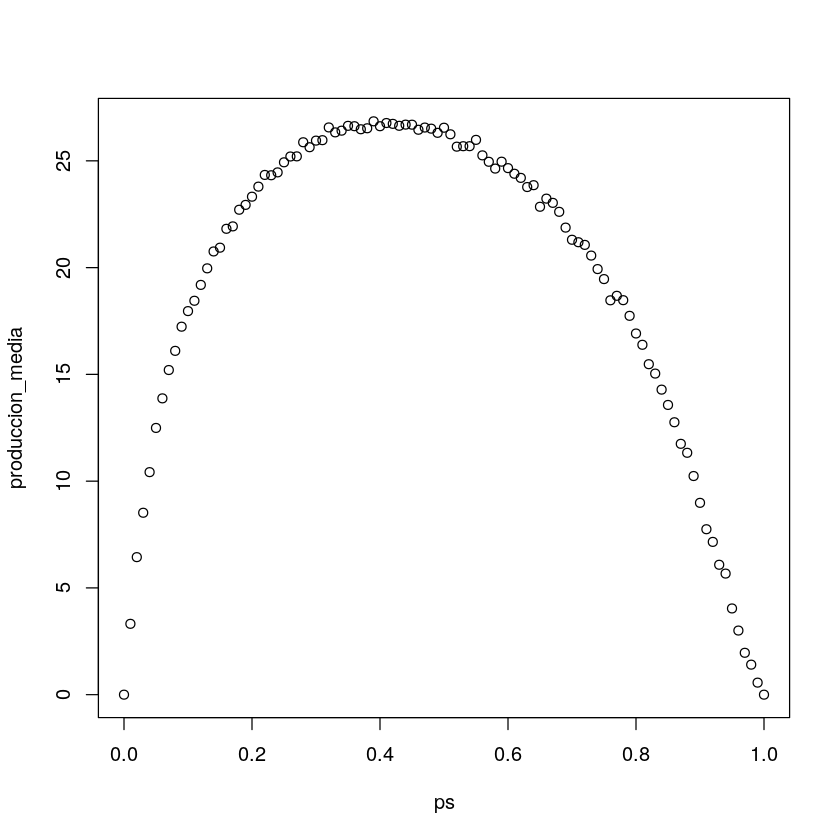

In [158]:
N_rep  <- 1000
N      <- 100
ps     <- seq(from = 0, to = 1, by = 0.01)
f      <- 0.2
produccion_media <- rep(0, length(p))
i = 1
for(p in ps){
    produccion_media[i] <- cosechaPromedio(p, N, N_rep, f)
    i = i + 1 
}
save(ps, produccion_media, file="corridas/p_vs_produccion_media_f02_N100_Nrep1000")
plot(ps, produccion_media)

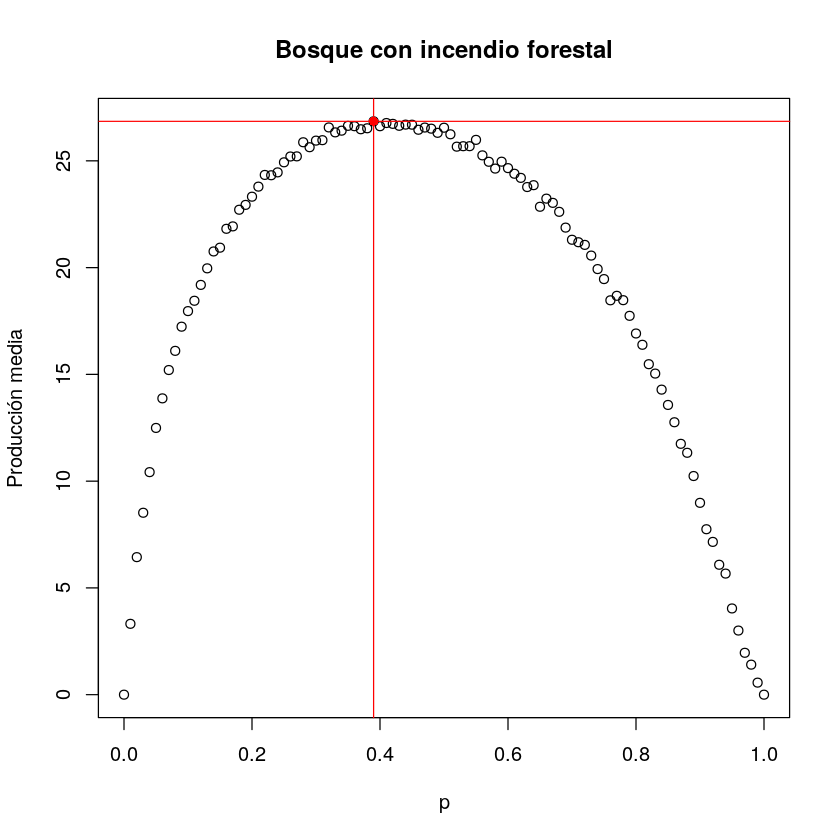

In [165]:
plot(ps, produccion_media, xlab="p", ylab="Producción media", main="Bosque con incendio forestal")
maxima_produccion <- which.max(produccion_media)
points(ps[maxima_produccion], produccion_media[maxima_produccion], col="red", pch = 16)
abline(v=ps[maxima_produccion], col="red")
abline(h=produccion_media[maxima_produccion], col="red")